# 텐서플로우 기초

In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.0-rc0


## 난수 생성

난수는 인공신경망에서 꼭 필요한 기능이다.
신경망을 쉽게 정의해보면 많은 숫자로 구성된 행렬이라고 할 수 있다.
이 행렬에 어떤 입력을 넣으면 출력을 얻게 되고, 잘 작동할 경우 원하는 출력에 점점 가까워지게 된다.

그런데 여기서 행렬을 구성하는 숫자는 어떻게 구할 수 있을까?
처음에는 이 숫자들을 랜덤한 값으로 지정해 줄 수 밖에 없다.
처음에 신경망의 초깃값을 지정해주는 것을 **초기화**라고 하며, 이에 관련해서도 많은 논문들이 나와 있다.
현재 가장 많이 쓰이는 방법은 Xavier 초기화 He 초기화인데, 이 방법들은 랜덤하지만 어느 정도 규칙성이 있는 범위 내에서 난수를 지정한다.

In [3]:
rand = tf.random.uniform([1], 0, 1)
print(rand)

tf.Tensor([0.92500806], shape=(1,), dtype=float32)


`tf.random.uniform` 함수를 불러오면 균일 분포(uniform distribution)의 난수를 얻을 수 있다.
**균일 분포란** 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다는 뜻이다.
어츰에 나오는 \[1\]은 결과값의 Shape을 의미한다.
Shape이란 행렬을 구성하는 행, 열 등 차원의 수를 나타내는 값이다.

In [4]:
rand = tf.random.uniform([4], 0, 1)
print(rand)

tf.Tensor([0.05884624 0.53586614 0.72280383 0.6044494 ], shape=(4,), dtype=float32)


균일 분포 외에 난수를 얻는 방법 중 중요한 분포로는 정규 분포가 있다.
정규 분포는 가운데가 높고 양극단으로 갈수록 낮아져서 종 모양을 그리는 분포이다.
정규 분포의 난수를 구하기 위해서는 `tf.random.uniform`을 `tf.random.normal`로 바꾸기만 하면 된다.

In [5]:
rand = tf.random.normal([4], 0, 1)
print(rand)

tf.Tensor([-0.37885112 -0.38492042 -1.7779353  -0.8406005 ], shape=(4,), dtype=float32)


균일 분포와 정규 분포에 대해 천만 개의 샘플을 각각 구해서 히스토그램으로 나타내면
균일 분포는 최솟값과 최댓값 사이에서 일정한 확률의 난수가 나타나게 되지만 정규 분포는 주어진 평군과
표준편차를 만족하는 종형 곡선을 그리게 된다.
정규 분포는 학생들의 시험 성적이나 키, 농작물의 무게 등 실생활에서 자주 볼 수 있는 분포 형태이다.
앞에서 소개한 Xaveri 초기화나 He 초기화는 균일 분포와 정규 분포 중 하나를 택해서 신경망의 초깃값을 초기화한다.

## 뉴런 만들기

신경망의 가장 기본적인 구성요소인 뉴런을 만들어보자!
이전에는 뉴런을 퍼셉트론이라고도 불렀으며, 입력을 받아서 계산 후 출력을 반환하는 단순한 구조이다.

사실 신경망은 뉴런이 여러 개 모여 레이어를 구성한 후, 이 레이어가 다시 모여 구성된 형태이다.
참고로 뉴런과 레이어를 우리말로 각각 '신경 세포'와 '층'이라고 할 수도 있겠지만
이 책에서는 의미상의 혼란을 막기 위해 뉴런, 레이어라고 표기하겠다.

뉴런은 입력, 가중치, 활성화함수, 출력으로 구성된다.

입력, 가중치, 출력은 보통 정수나 `float`이 많이 쓰인다.
활서오하 함수는 뉴런의 출력값을 정하는 함수이다.
가장 간단한 형태의 뉴런은 입력에 가중치를 곱한 뒤 활성화함수를 취하면 출력을 얻을 수 있다.

뉴런에서 학습할 때 변하는 것은 가중치이다.
가중치는 처음에는 초기화를 통해 랜덤한 값을 넣고, 학습과정에서 점차 일정한 값으로 수렴한다.
학습이 잘 된다는 것은 좋은 가중치를 얻어서 원하는 출력에 점점 가까운 값을 얻는 것이라고 할 수 있다.

![딥러닝 학습을 이용한 가상 인물의 생성 사례](https://raw.githubusercontent.com/artcg/BEGAN/master/readme/conv_measure_vis.png)

활성화함수로는 **시그모이드, ReLU** 등을 주로 쓰게 된다.
- 시그모이드
    S자 형태의 곡선이라는 뜻
    ![시그모이드](https://www.researchgate.net/profile/Tali-Leibovich-Raveh/publication/325868989/figure/fig2/AS:639475206074368@1529474178211/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing.png)
- ReLU
    Rectified Linear Unit의 약자로, 정류된(Rectified) 선형 함수(Linear unit)라는 뜻
    딥러닝에서 선형 함수는 y=x 라는 식으로 정의할 수 있는 입력과 출력이 동일한 함수를 의미한다.
    이 함수를 정류해서 음수 값을 0으로 만드는 것이 ReLU이다.
    ![ReLU](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FvME2z%2Fbtqw7PNYtLH%2FiCEiirYdHXexT9PcmdymAK%2Fimg.png)

신경망 초창기에는 시그모이드가 주로 쓰였지만 은닉층을 다수 사용하는 딥러닝 시대가 되면서 ReLU가 더 많이 쓰이고 있다.
딥러닝에서 오류를 역전파 할 때 시그모이드 함수가 값을 점점 작아지게 하는 문제를 지적하면서, ReLU를 대안으로 내세웠다고 한다.
시그모이드는 출력값을 0~1 사이로만 제한하게 되지만, ReLU는 양수를 그대로 반환하기 때문에 값의 왜곡이 적어진다.

In [6]:
## sigmoid 함수
import math

def sigmoid(x):
    # math.exp 는 제곱 함수이다.
    return 1 / (1 + math.exp(-x))

In [7]:
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x*w)
print(output)

0.3552876341374605


입력인 x에는 1을 넣고 가중치는 정규 분포의 랜덤한 값을 넣는다. 실제출력인 output은 sigmoid() 함수에 입력과 출력을 곱한 값을 넣어서 계산한다.

실제출력으로 나온 값과 기대출력인 0의 차이는 에러라고 한다. 뉴런의 학습은 이 에러가 0에 가까워지게 해서 출력으로 기댓값에 가까운 값을 얻는 것이다.

여기서 뉴런이란 결국 w 값이다 이제 이 w를 변화시켜야 하는데, 어떤 알고리즘을 사용해야 할까?
경사 하강법(Gradient Descent)이라는 방법을 사용하게 되는데, 이것은 w에 입력과 학습률(alpha)과 에러를 곱한 값을 더해주는 것이다.
학습률은 w를 업데이트하는 정도로, 큰 값으로 설정하면 학습이 빨리 되지만 과도한 학습으로 적정한 수치를 벗어날 우려가 있고,
너무 작은 값으로 설정하면 학습 속도가 너무 느려질 수 있다. 여기서 $$\alpha = 0.1$$로 설정하겠다.

$$
w = w + x \times \alpha \times error
$$

In [8]:
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.09033646449339823 0.09033646449339823
199 -0.048917631469779115 0.048917631469779115
299 -0.03326687084678835 0.03326687084678835
399 -0.025134919197337142 0.025134919197337142
499 -0.020172949296071566 0.020172949296071566
599 -0.0168361190702355 0.0168361190702355
699 -0.014440820052283613 0.014440820052283613
799 -0.012639086077629107 0.012639086077629107
899 -0.011235143796994132 0.011235143796994132
999 -0.01011070169710295 0.01011070169710295


In [9]:
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


입력을 0으로 바꾸고 기댓값을 1로 바꾸면, error가 변하지 않고, 출력도 0.5에서 변하지도 않는다. 왜 이런 일이 발생하는 걸까?

경사 하강법은 업데이트 식은 아래와 같다.

$$w = w + x \times \alpha \times error$$

x = 0이기 때문에 w에 더해지는 값은은 없다. 결국 1,000번의 실행 동안 w 값은 변하지 않는다.

그럼 어떻게 해야 할까? 출이런 경우를 방지하기 위해 편향(bias)이라는 것을 뉴런에 넣어준다.
편향이라는 말처럼 입력으로는 늘 한쪽으로 치우친 고정된 값을 받아서 입력으로 0을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지한다.
편향의 입력으로는 보편적으로 쓰이는 1을 넣어보자.

편향은 w처럼 난수로 초기화되며 뉴런에 더해져서 출력을 계산하게 된다. 수식에서는 관용적으로 bias의 앞 글자인 b를 쓴다.
![편향이 더해진 뉴런의 출력 계산식](http://blog.quantylab.com/img/2020-03-10-dl_hist/perceptron.png)

In [10]:
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w + 1 *b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.11359646746117791 0.8864035325388221
199 0.055380020238409156 0.9446199797615908
299 0.03618889173633222 0.9638111082636678
399 0.026782969009446322 0.9732170309905537
499 0.021226662153463693 0.9787733378465363
599 0.017566338628951628 0.9824336613710484
699 0.014976137417622382 0.9850238625823776
799 0.013047995860199668 0.9869520041398003
899 0.011557571954243007 0.988442428045757
999 0.010371361835177395 0.9896286381648226


## 첫번째 신경망 네트워크 : AND


이 네트워크의 구성요소는 앞에서 본 것과 같은 하나의 뉴런이다. 여기서는 AND 연산을 수행하는 뉴런을 만들어보자.
AND 연산은 여러 개의 입력을 받을 수 있지만, 여기서는 2개의 입력만으로 제한하겠다.

AND 연산은 입력이 모두 참 값일 때 참이 되고, 그 밖의 경우에는 모두 거짓이 된다.

뉴런은 여러 개의 입력을 받을 수 있기 때문에 입력이 2개여도 문제가 없다. 이와 달리 편향은 보통 한 개만 사용한다.
![편향이 더해진 뉴런의 출력 계산식](http://blog.quantylab.com/img/2020-03-10-dl_hist/perceptron.png)

In [11]:
import numpy as np

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(str(i).zfill(4), error_sum)

0199 -0.10754151097262732
0399 -0.06471889596547625
0599 -0.04616958540665332
0799 -0.03578251064556126
0999 -0.029157583251623837
1199 -0.024575079386626005
1399 -0.021221581330202483
1599 -0.018663582020234333
1799 -0.016649810694483548
1999 -0.015023443738249313


파이썬에서 정수로 된 리스트에 정수를 곱셈과 numpy 리스트에 정수를 곱한 것과 조금 다른 결과가 나온다.


In [12]:
print([1,2,3]*2)
print([1,2,3]*0)

import numpy as np
print(np.array([1,2,3]) * 2)
print(np.array([1,2,3]) * 0)

[1, 2, 3, 1, 2, 3]
[]
[2 4 6]
[0 0 0]


In [13]:
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [1] Output: 0.9649263587081343
X: [1 0] Y: [0] Output: 0.024854865785815576
X: [0 1] Y: [0] Output: 0.024930816664469065
X: [0 0] Y: [0] Output: 2.3687522332578413e-05


## 두번째 신경망 네트워크 : OR

OR은 AND와 매우 비슷한 진리표를 가지고 있다.
AND 연산의 입력이 모두 참일 때만 결괏값이 참이었던 것과 다르게 OR 연산은 입력 중 하나만 참이어도 결괏값이 참이 되고, 모두 거짓일 때만 거짓이 된다.

In [14]:
import numpy as np

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 199:
        print(i, error_sum)

199 -0.045381653668757266
399 -0.024676293136118452
599 -0.01683812828431526
799 -0.01273671307591305
999 -0.010224556407517495
1199 -0.008531736863341965
1399 -0.0073151816664603075
1599 -0.006399362444217967
1799 -0.00568642556564743
1999 -0.005113922457492839


In [15]:
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [1] Output: 0.9999972636051094
X: [1 0] Y: [1] Output: 0.9898527767096056
X: [0 1] Y: [1] Output: 0.9898440561583455
X: [0 0] Y: [0] Output: 0.025356847882334322


## 세번째 신경만 네트워크 : XOR

In [16]:
import numpy as np

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 199:
        print(i, error_sum)

199 -0.00609619109731252
399 -0.0002478878320786304
599 -1.006654615798297e-05
799 -4.085818956500731e-07
999 5.584263385038923e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [17]:
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


AND 네트워크의 가중치가 하려는 작업은 XOR 네트워크에 비해 분명하다.
두 개의 가중치가 비슷하니 때문에 입력 2개는 서로 거의 비슷한 중요도를 가진다.
편향값은 큰 음수인데, 이것은 중간 계산 값을 음수로 보내는 경향을 가진다.
두 가중치를 모두 합쳐야 음수 편향을 이겨낼 수 있다.

반면 XOR 네트워크는 어떤 일을 하려는지 명확하지 않다.
가중치 w1이 w2에 비해 좀 더 큰 값을 가지고 있기는 하지만 중간 계산값은 0에 가까워지고 시그모이드 함수를 취한 값은 0.5에 가까워질 뿐이다.

이것이 바로 첫번째 인공지능의 겨울을 불러온 것으로 잘 알려진 XOR 문제이다.
하나의 퍼셉트론으로는 간단한 XOR 연산자도 만들어낼 수 없다는 것을 수학자들이 증명해냈다.

그럼 해결책은 무엇일까? 바로 여러 개의 퍼셉트론을 사용하는 것이다.
사실 <퍼셉트론>에서도 여러 개의 퍼셉트론을 사용하면 XOR 문제를 포함한 어떤 불린 함수든지 풀 수 있다는 사실을 언급하고 있다.

여거서는 세 개의 퍼셉트론과 뉴런을 사용해보겠다.

In [18]:
import numpy as np
import tensorflow as tf
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


먼저 model에 대해서 알아보자.
딥러닝에서 가장 많이 쓰이는 구조는 `Sequential`이다.
말 그대로 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것이다.
이를 국어로는 시퀀셜 네트워크, 시퀀셜 모델로 부른다.

위의 레이어를 보면 첫번째 레이어에서는 뉴런이 2개가 생성 되고 입력 값이 두개니까 경우의 수가 총 4개가 나와야 하겠지만,
편향 또한 입력 값에 속하기 떄문에 총 경우의 수가 6개가 된다.

두번째 레이어도 마찬가지로 뉴런이 한개이고 이전 레이어의 결과가 2개이기 때문에 경우의 수가 2개가 나와야 하겠지만, 편향 추가 되면서
경우의 수가 3개가 된다.


최적화 함수는 딥러닝의 학습식을 정의하는 부분이다. 원래는 미분과 복잡한 수학을 써야하지만, 케라스에서 미리 정의된 최적화 함수들을 불러오는 것이 가능하다.
SDG는 확률적 경사 하강법(Stochastic Gradient Descent)의 약자이다. 여기서 경사 하강법은 가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트하겠다는 뜻이고, 확률적(Stochastic)은 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산하겠다는 뜻이다.

손실(loss)은 앞에서 살펴본 error와 비슷한 개념이다. 딥러닝은 보통 이 손실을 줄이는 방향으로 학습한다. mse는 평균 제곱 오차(Mean Squared Error)의 약자로, 기대출력에서 실제출력을 뺀 뒤에 제곱한 값을 평균하는 것이다.

$$MSE = \frac{1}{n}\sum_{k=1}^N ({y_k} - {output_k})^2$$

In [19]:
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 470us/step - loss: 0.1966
Epoch 2/2000
4/4 [==============================] - 0s 335us/step - loss: 0.3507
Epoch 3/2000
4/4 [==============================] - 0s 321us/step - loss: 0.3359
Epoch 4/2000
4/4 [==============================] - 0s 306us/step - loss: 0.2119
Epoch 5/2000
4/4 [==============================] - 0s 343us/step - loss: 0.3360
Epoch 6/2000
4/4 [==============================] - 0s 311us/step - loss: 0.2063
Epoch 7/2000
4/4 [==============================] - 0s 373us/step - loss: 0.3210
Epoch 8/2000
4/4 [==============================] - 0s 731us/step - loss: 0.2378
Epoch 9/2000
4/4 [==============================] - 0s 404us/step - loss: 0.2235
Epoch 10/2000
4/4 [==============================] - 0s 453us/step - loss: 0.2127
Epoch 11/2000
4/4 [==============================] - 0s 449us/step - loss: 0.2778
Epoch 12/2000
4/4 [==============================] - 0s 925us/step - loss: 0.2600
Epoch 13/2000
4/4 [======

4/4 [==============================] - 0s 317us/step - loss: 0.2523
Epoch 102/2000
4/4 [==============================] - 0s 362us/step - loss: 0.2502
Epoch 103/2000
4/4 [==============================] - 0s 385us/step - loss: 0.2413
Epoch 104/2000
4/4 [==============================] - 0s 525us/step - loss: 0.2551
Epoch 105/2000
4/4 [==============================] - 0s 394us/step - loss: 0.2607
Epoch 106/2000
4/4 [==============================] - 0s 364us/step - loss: 0.2504
Epoch 107/2000
4/4 [==============================] - 0s 345us/step - loss: 0.2412
Epoch 108/2000
4/4 [==============================] - 0s 342us/step - loss: 0.2605
Epoch 109/2000
4/4 [==============================] - 0s 337us/step - loss: 0.2549
Epoch 110/2000
4/4 [==============================] - 0s 364us/step - loss: 0.2413
Epoch 111/2000
4/4 [==============================] - 0s 370us/step - loss: 0.2591
Epoch 112/2000
4/4 [==============================] - 0s 458us/step - loss: 0.2547
Epoch 113/2000
4/4 

Epoch 200/2000
4/4 [==============================] - 0s 508us/step - loss: 0.2582
Epoch 201/2000
4/4 [==============================] - 0s 454us/step - loss: 0.2505
Epoch 202/2000
4/4 [==============================] - 0s 606us/step - loss: 0.2449
Epoch 203/2000
4/4 [==============================] - 0s 569us/step - loss: 0.2490
Epoch 204/2000
4/4 [==============================] - 0s 452us/step - loss: 0.2591
Epoch 205/2000
4/4 [==============================] - 0s 363us/step - loss: 0.2517
Epoch 206/2000
4/4 [==============================] - 0s 349us/step - loss: 0.2525
Epoch 207/2000
4/4 [==============================] - 0s 371us/step - loss: 0.2540
Epoch 208/2000
4/4 [==============================] - 0s 358us/step - loss: 0.2448
Epoch 209/2000
4/4 [==============================] - 0s 427us/step - loss: 0.2596
Epoch 210/2000
4/4 [==============================] - 0s 511us/step - loss: 0.2452
Epoch 211/2000
4/4 [==============================] - 0s 401us/step - loss: 0.2627
Epoc

4/4 [==============================] - 0s 430us/step - loss: 0.2377
Epoch 299/2000
4/4 [==============================] - 0s 451us/step - loss: 0.2494
Epoch 300/2000
4/4 [==============================] - 0s 338us/step - loss: 0.2626
Epoch 301/2000
4/4 [==============================] - 0s 357us/step - loss: 0.2494
Epoch 302/2000
4/4 [==============================] - 0s 445us/step - loss: 0.2375
Epoch 303/2000
4/4 [==============================] - 0s 417us/step - loss: 0.2387
Epoch 304/2000
4/4 [==============================] - 0s 344us/step - loss: 0.2593
Epoch 305/2000
4/4 [==============================] - 0s 451us/step - loss: 0.2455
Epoch 306/2000
4/4 [==============================] - 0s 572us/step - loss: 0.2584
Epoch 307/2000
4/4 [==============================] - 0s 489us/step - loss: 0.2440
Epoch 308/2000
4/4 [==============================] - 0s 345us/step - loss: 0.2490
Epoch 309/2000
4/4 [==============================] - 0s 351us/step - loss: 0.2440
Epoch 310/2000
4/4 

4/4 [==============================] - 0s 588us/step - loss: 0.2355
Epoch 397/2000
4/4 [==============================] - 0s 405us/step - loss: 0.2419
Epoch 398/2000
4/4 [==============================] - 0s 352us/step - loss: 0.2421
Epoch 399/2000
4/4 [==============================] - 0s 386us/step - loss: 0.2554
Epoch 400/2000
4/4 [==============================] - 0s 374us/step - loss: 0.2463
Epoch 401/2000
4/4 [==============================] - 0s 573us/step - loss: 0.2392
Epoch 402/2000
4/4 [==============================] - 0s 388us/step - loss: 0.2370
Epoch 403/2000
4/4 [==============================] - 0s 431us/step - loss: 0.2461
Epoch 404/2000
4/4 [==============================] - 0s 358us/step - loss: 0.2320
Epoch 405/2000
4/4 [==============================] - 0s 375us/step - loss: 0.2573
Epoch 406/2000
4/4 [==============================] - 0s 363us/step - loss: 0.2419
Epoch 407/2000
4/4 [==============================] - 0s 433us/step - loss: 0.2393
Epoch 408/2000
4/4 

4/4 [==============================] - 0s 361us/step - loss: 0.2661
Epoch 495/2000
4/4 [==============================] - 0s 363us/step - loss: 0.2368
Epoch 496/2000
4/4 [==============================] - 0s 382us/step - loss: 0.2520
Epoch 497/2000
4/4 [==============================] - 0s 643us/step - loss: 0.2576
Epoch 498/2000
4/4 [==============================] - 0s 462us/step - loss: 0.2522
Epoch 499/2000
4/4 [==============================] - 0s 571us/step - loss: 0.2584
Epoch 500/2000
4/4 [==============================] - 0s 517us/step - loss: 0.2320
Epoch 501/2000
4/4 [==============================] - 0s 464us/step - loss: 0.2586
Epoch 502/2000
4/4 [==============================] - 0s 562us/step - loss: 0.2587
Epoch 503/2000
4/4 [==============================] - 0s 601us/step - loss: 0.2582
Epoch 504/2000
4/4 [==============================] - 0s 468us/step - loss: 0.2359
Epoch 505/2000
4/4 [==============================] - 0s 404us/step - loss: 0.2672
Epoch 506/2000
4/4 

4/4 [==============================] - 0s 589us/step - loss: 0.2182
Epoch 593/2000
4/4 [==============================] - 0s 487us/step - loss: 0.2292
Epoch 594/2000
4/4 [==============================] - 0s 378us/step - loss: 0.2180
Epoch 595/2000
4/4 [==============================] - 0s 376us/step - loss: 0.2327
Epoch 596/2000
4/4 [==============================] - 0s 416us/step - loss: 0.2294
Epoch 597/2000
4/4 [==============================] - 0s 391us/step - loss: 0.2402
Epoch 598/2000
4/4 [==============================] - 0s 358us/step - loss: 0.2293
Epoch 599/2000
4/4 [==============================] - 0s 330us/step - loss: 0.2482
Epoch 600/2000
4/4 [==============================] - 0s 305us/step - loss: 0.2164
Epoch 601/2000
4/4 [==============================] - 0s 348us/step - loss: 0.2668
Epoch 602/2000
4/4 [==============================] - 0s 373us/step - loss: 0.2620
Epoch 603/2000
4/4 [==============================] - 0s 414us/step - loss: 0.2490
Epoch 604/2000
4/4 

4/4 [==============================] - 0s 579us/step - loss: 0.2609
Epoch 691/2000
4/4 [==============================] - 0s 324us/step - loss: 0.2111
Epoch 692/2000
4/4 [==============================] - 0s 349us/step - loss: 0.2472
Epoch 693/2000
4/4 [==============================] - 0s 334us/step - loss: 0.2354
Epoch 694/2000
4/4 [==============================] - 0s 298us/step - loss: 0.2169
Epoch 695/2000
4/4 [==============================] - 0s 339us/step - loss: 0.2039
Epoch 696/2000
4/4 [==============================] - 0s 506us/step - loss: 0.2038
Epoch 697/2000
4/4 [==============================] - 0s 473us/step - loss: 0.2621
Epoch 698/2000
4/4 [==============================] - 0s 457us/step - loss: 0.2449
Epoch 699/2000
4/4 [==============================] - 0s 441us/step - loss: 0.2529
Epoch 700/2000
4/4 [==============================] - 0s 330us/step - loss: 0.2537
Epoch 701/2000
4/4 [==============================] - 0s 300us/step - loss: 0.2330
Epoch 702/2000
4/4 

4/4 [==============================] - 0s 356us/step - loss: 0.2527
Epoch 789/2000
4/4 [==============================] - 0s 350us/step - loss: 0.2108
Epoch 790/2000
4/4 [==============================] - 0s 346us/step - loss: 0.1986
Epoch 791/2000
4/4 [==============================] - 0s 318us/step - loss: 0.2251
Epoch 792/2000
4/4 [==============================] - 0s 316us/step - loss: 0.2404
Epoch 793/2000
4/4 [==============================] - 0s 319us/step - loss: 0.2096
Epoch 794/2000
4/4 [==============================] - 0s 305us/step - loss: 0.2617
Epoch 795/2000
4/4 [==============================] - 0s 331us/step - loss: 0.2116
Epoch 796/2000
4/4 [==============================] - 0s 350us/step - loss: 0.2135
Epoch 797/2000
4/4 [==============================] - 0s 368us/step - loss: 0.2114
Epoch 798/2000
4/4 [==============================] - 0s 408us/step - loss: 0.2616
Epoch 799/2000
4/4 [==============================] - 0s 354us/step - loss: 0.2131
Epoch 800/2000
4/4 

4/4 [==============================] - 0s 579us/step - loss: 0.2661
Epoch 887/2000
4/4 [==============================] - 0s 339us/step - loss: 0.2151
Epoch 888/2000
4/4 [==============================] - 0s 398us/step - loss: 0.1714
Epoch 889/2000
4/4 [==============================] - 0s 371us/step - loss: 0.2142
Epoch 890/2000
4/4 [==============================] - 0s 373us/step - loss: 0.1896
Epoch 891/2000
4/4 [==============================] - 0s 364us/step - loss: 0.2321
Epoch 892/2000
4/4 [==============================] - 0s 370us/step - loss: 0.2256
Epoch 893/2000
4/4 [==============================] - 0s 391us/step - loss: 0.2139
Epoch 894/2000
4/4 [==============================] - 0s 429us/step - loss: 0.2007
Epoch 895/2000
4/4 [==============================] - 0s 399us/step - loss: 0.1889
Epoch 896/2000
4/4 [==============================] - 0s 603us/step - loss: 0.2659
Epoch 897/2000
4/4 [==============================] - 0s 487us/step - loss: 0.2317
Epoch 898/2000
4/4 

Epoch 985/2000
4/4 [==============================] - 0s 417us/step - loss: 0.2601
Epoch 986/2000
4/4 [==============================] - 0s 403us/step - loss: 0.2193
Epoch 987/2000
4/4 [==============================] - 0s 443us/step - loss: 0.2192
Epoch 988/2000
4/4 [==============================] - 0s 396us/step - loss: 0.1882
Epoch 989/2000
4/4 [==============================] - 0s 697us/step - loss: 0.2179
Epoch 990/2000
4/4 [==============================] - 0s 405us/step - loss: 0.1821
Epoch 991/2000
4/4 [==============================] - 0s 390us/step - loss: 0.1816
Epoch 992/2000
4/4 [==============================] - 0s 591us/step - loss: 0.1676
Epoch 993/2000
4/4 [==============================] - 0s 503us/step - loss: 0.2495
Epoch 994/2000
4/4 [==============================] - 0s 654us/step - loss: 0.1731
Epoch 995/2000
4/4 [==============================] - 0s 472us/step - loss: 0.1679
Epoch 996/2000
4/4 [==============================] - 0s 535us/step - loss: 0.1532
Epoc

4/4 [==============================] - 0s 352us/step - loss: 0.1775
Epoch 1083/2000
4/4 [==============================] - 0s 364us/step - loss: 0.2485
Epoch 1084/2000
4/4 [==============================] - 0s 583us/step - loss: 0.2127
Epoch 1085/2000
4/4 [==============================] - 0s 377us/step - loss: 0.1805
Epoch 1086/2000
4/4 [==============================] - 0s 342us/step - loss: 0.1803
Epoch 1087/2000
4/4 [==============================] - 0s 339us/step - loss: 0.1939
Epoch 1088/2000
4/4 [==============================] - 0s 333us/step - loss: 0.1566
Epoch 1089/2000
4/4 [==============================] - 0s 357us/step - loss: 0.1570
Epoch 1090/2000
4/4 [==============================] - 0s 351us/step - loss: 0.2604
Epoch 1091/2000
4/4 [==============================] - 0s 409us/step - loss: 0.1773
Epoch 1092/2000
4/4 [==============================] - 0s 467us/step - loss: 0.1398
Epoch 1093/2000
4/4 [==============================] - 0s 460us/step - loss: 0.2183
Epoch 10

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4/4 [==============================] - 0s 713us/step - loss: 0.1281
Epoch 1699/2000
4/4 [==============================] - 0s 484us/step - loss: 0.1995
Epoch 1700/2000
4/4 [==============================] - 0s 303us/step - loss: 0.1995
Epoch 1701/2000
4/4 [==============================] - 0s 297us/step - loss: 0.1295
Epoch 1702/2000
4/4 [==============================] - 0s 290us/step - loss: 0.2614
Epoch 1703/2000
4/4 [==============================] - 0s 359us/step - loss: 0.1295
Epoch 1704/2000
4/4 [==============================] - 0s 348us/step - loss: 0.2021
Epoch 1705/2000
4/4 [==============================] - 0s 410us/step - loss: 0.2535
Epoch 1706/2000
4/4 [==============================] - 0s 498us/step - loss: 0.1914
Epoch 1707/2000
4/4 [==============================] - 0s 509us/step - loss: 0.1081
Epoch 1708/2000
4/4 [==============================] - 0s 365us/step - loss: 0.1491
Epoch 1709/2000
4/4 [==============================] - 0s 311us/step - loss: 0.1491
Epoch 17

4/4 [==============================] - 0s 441us/step - loss: 0.2388
Epoch 1796/2000
4/4 [==============================] - 0s 432us/step - loss: 0.1572
Epoch 1797/2000
4/4 [==============================] - 0s 542us/step - loss: 0.1055
Epoch 1798/2000
4/4 [==============================] - 0s 560us/step - loss: 0.1887
Epoch 1799/2000
4/4 [==============================] - 0s 473us/step - loss: 0.1562
Epoch 1800/2000
4/4 [==============================] - 0s 335us/step - loss: 0.2583
Epoch 1801/2000
4/4 [==============================] - 0s 321us/step - loss: 0.1688
Epoch 1802/2000
4/4 [==============================] - 0s 325us/step - loss: 0.1304
Epoch 1803/2000
4/4 [==============================] - 0s 331us/step - loss: 0.1886
Epoch 1804/2000
4/4 [==============================] - 0s 310us/step - loss: 0.1514
Epoch 1805/2000
4/4 [==============================] - 0s 451us/step - loss: 0.1569
Epoch 1806/2000
4/4 [==============================] - 0s 373us/step - loss: 0.1277
Epoch 18

4/4 [==============================] - 0s 433us/step - loss: 0.1367
Epoch 1893/2000
4/4 [==============================] - 0s 421us/step - loss: 0.1442
Epoch 1894/2000
4/4 [==============================] - 0s 346us/step - loss: 0.1038
Epoch 1895/2000
4/4 [==============================] - 0s 327us/step - loss: 0.1403
Epoch 1896/2000
4/4 [==============================] - 0s 327us/step - loss: 0.1404
Epoch 1897/2000
4/4 [==============================] - 0s 414us/step - loss: 0.1508
Epoch 1898/2000
4/4 [==============================] - 0s 523us/step - loss: 0.1405
Epoch 1899/2000
4/4 [==============================] - 0s 576us/step - loss: 0.1849
Epoch 1900/2000
4/4 [==============================] - 0s 510us/step - loss: 0.1370
Epoch 1901/2000
4/4 [==============================] - 0s 631us/step - loss: 0.2525
Epoch 1902/2000
4/4 [==============================] - 0s 832us/step - loss: 0.1405
Epoch 1903/2000
4/4 [==============================] - 0s 731us/step - loss: 0.2543
Epoch 19

4/4 [==============================] - 0s 624us/step - loss: 0.1618
Epoch 1990/2000
4/4 [==============================] - 0s 874us/step - loss: 0.2489
Epoch 1991/2000
4/4 [==============================] - 0s 520us/step - loss: 0.2265
Epoch 1992/2000
4/4 [==============================] - 0s 351us/step - loss: 0.1893
Epoch 1993/2000
4/4 [==============================] - 0s 462us/step - loss: 0.2264
Epoch 1994/2000
4/4 [==============================] - 0s 336us/step - loss: 0.1042
Epoch 1995/2000
4/4 [==============================] - 0s 322us/step - loss: 0.1198
Epoch 1996/2000
4/4 [==============================] - 0s 310us/step - loss: 0.1962
Epoch 1997/2000
4/4 [==============================] - 0s 532us/step - loss: 0.1494
Epoch 1998/2000
4/4 [==============================] - 0s 462us/step - loss: 0.1499
Epoch 1999/2000
4/4 [==============================] - 0s 392us/step - loss: 0.1394
Epoch 2000/2000
4/4 [==============================] - 0s 354us/step - loss: 0.2276


In [20]:
model.predict(x)

array([[0.6339794]], dtype=float32)

In [21]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.17133152, -4.6409454 ],
       [ 0.9951808 , -4.7041273 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.18074246,  0.5122551 ], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.7936218],
       [-4.4982944]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([1.1279392], dtype=float32)>


# 시각화 기초

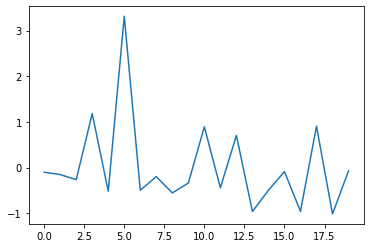

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

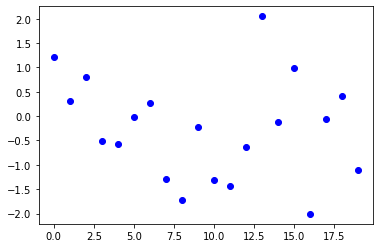

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y, 'bo')
plt.show()

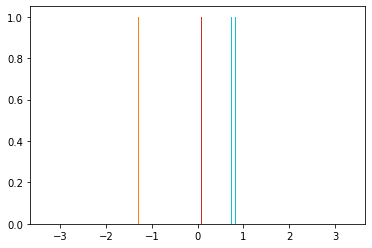

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
random_normal = tf.random.normal([1000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

## 2-Layer XOR 네트워크의 정보 시각화

딥러닝을 학습시킬 때 가장 많이 보게 될 그래프는 바로 학습이 잘 되고 있는지 확인하기 위한 측정치 변화량을 나타내는 선 그래프이다.
여기서는 선 그래프를 이용해 손실이 어떻게 변했는지를 알아보자.

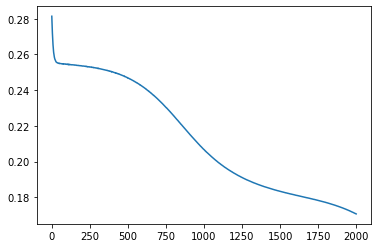

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint